<a href="https://colab.research.google.com/github/neel0086/deep_learning/blob/main/cpu_vs_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
(X_train,Y_train), (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
classes = ["airplane","automobile	","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])


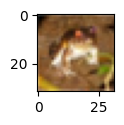

In [ ]:
plot_sample(0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
Y_train_categorical = keras.utils.to_categorical(
  Y_train, num_classes =10, dtype = 'float32'
)
Y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_test_categorical = keras.utils.to_categorical(
  Y_test, num_classes =10, dtype = 'float32'
)
Y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])


model.compile(optimizer="SGD",
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


model.fit(X_train_scaled,Y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8080 - accuracy: 0.3574
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6224 - accuracy: 0.4283
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5386 - accuracy: 0.4577
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4805 - accuracy: 0.4777
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4311 - accuracy: 0.4959
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3868 - accuracy: 0.5136
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3497 - accuracy: 0.5255
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3151 - accuracy: 0.5371
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2834 - accuracy: 0.5498
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.25

In [ ]:
classes[Y_test[0][0]]

'cat'

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'cat'

In [ ]:
def getModel():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])


  model.compile(optimizer="SGD",
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )


  return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=getModel()
  cpu_model.fit(X_train_scaled,Y_train_categorical, epochs=1)

1563/1563 [==============================] - 137s 87ms/step - loss: 1.8099 - accuracy: 0.3571
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model=getModel()
  cpu_model.fit(X_train_scaled,Y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8094 - accuracy: 0.3531
12.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
